# Video Games Sales Data

Dataset: https://www.kaggle.com/datasets/gregorut/videogamesales

## Data Dictionary

| Column        | Explanation                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| Rank          | Ranking of overall sales                                                      |
| Name          | Name of the game                                                              |
| Platform      | Platform of the games release (i.e. PC,PS4, etc.)                             |
| Year          | Year the game was released in                                                 |
| Genre         | Genre of the game                                                             |
| Publisher     | Publisher of the game                                                         |
| NA_Sales      | Number of sales in North America (in millions)                                |
| EU_Sales      | Number of sales in Europe (in millions)                                       |
| JP_Sales      | Number of sales in Japan (in millions)                                        |
| Other_Sales   | Number of sales in other parts of the world (in millions)                     |
| Global_Sales  | Number of total sales (in millions)                                           |

# Data Cleaning

- Import pandas as pd
- read csv and parse 'Year' column as datetime
- show the first 5 rows of the dataset

In [2]:
# Video Games Sales Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vgsales = pd.read_csv('vgsales.csv', parse_dates =['Year'])
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Data type check

In [3]:
#Data type check
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Missing values check

In [4]:
#Missing values check
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Drop missing values and check the amount of missing values remained

In [5]:
threshold = 0.05
column_drop = [ ]

for i in vgsales.columns:
    if vgsales[i].isna().sum() / len(vgsales) <= threshold:
        column_drop.append(i)

vgsales.dropna(subset = column_drop, inplace = True)

In [6]:
vgsales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Alter the column so that year in 'Year' column is displayed correctly (no decimals)

In [7]:
vgsales['Year'] = vgsales['Year'].dt.year
vgsales['Year'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: Year, dtype: int64

In [8]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Challenges
**Explore**: Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?

**Visualize**: Create a plot visualizing the average sales for games in the most popular three genres. Differentiate between NA, EU, and global sales.

**Analyze**: Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?

# Explore

In [9]:
# Which of Xbox 360, Playstation 3, and Nintendo Wii had the highest total sales globally?
vgsales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Filter only video games on Xbox 360, Playstation 3, and Nintendo Wii

In [10]:
vgsales_filter = vgsales[vgsales['Platform'].isin(['X360', 'PS3', 'Wii'])]
vgsales_filter

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16541,16544,Battle Fantasia,PS3,2008,Fighting,505 Games,0.00,0.00,0.01,0.00,0.01
16552,16555,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16573,16576,Mini Desktop Racing,Wii,2007,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


Xbox 360 yields the highest global sales overall, followed by Playstation 3 and Nintendo Wii

In [11]:
vgsales_filter.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)

Platform
X360    969.60
PS3     949.35
Wii     909.81
Name: Global_Sales, dtype: float64

Top 10 global sales by year and platform

In [12]:
vgsales_filter.groupby(['Year', 'Platform'])['Global_Sales'].sum()\
.reset_index().sort_values(by = 'Global_Sales', ascending = False).head(10)

,Year,Platform,Global_Sales
11,2009,Wii,210.44
8,2008,Wii,174.16
15,2010,X360,171.05
16,2011,PS3,159.37
5,2007,Wii,154.97
18,2011,X360,145.12
13,2010,PS3,144.42
2,2006,Wii,137.91
9,2008,X360,135.76
10,2009,PS3,132.34


# Visualize

In [13]:
#Create a plot visualizing the average sales for games in the most popular three genres.
#Differentiate between NA, EU, and global sales.

#Columns used: Name, Genre, NA_Sales, EU_Sales, Global_Sales
#Only top 3 genres are required

In [14]:
 vgsales[['Name', 'Genre', 'NA_Sales', 'EU_Sales', 'Global_Sales']].head()

,Name,Genre,NA_Sales,EU_Sales,Global_Sales
0,Wii Sports,Sports,41.49,29.02,82.74
1,Super Mario Bros.,Platform,29.08,3.58,40.24
2,Mario Kart Wii,Racing,15.85,12.88,35.82
3,Wii Sports Resort,Sports,15.75,11.01,33.00
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,31.37


Separate top three games and genres for each region (NA, EU, Global)

In [15]:
na_sales = vgsales[['Name', 'Genre', 'NA_Sales']]
na_sales_top_3 = na_sales.groupby(['Name', 'Genre'])['NA_Sales'].mean().reset_index()\
.sort_values(by = 'NA_Sales', ascending = False).head(3)
na_sales_top_3

,Name,Genre,NA_Sales
10853,Wii Sports,Sports,41.49
2542,Duck Hunt,Shooter,26.93
9204,Super Mario Bros.,Platform,16.24


In [16]:
eu_sales = vgsales[['Name', 'Genre', 'EU_Sales']]
eu_sales_top_3 = eu_sales.groupby(['Name', 'Genre'])['EU_Sales'].mean().reset_index()\
.sort_values(by = 'EU_Sales', ascending = False).drop_duplicates(subset = ['Genre']).head(3)
eu_sales_top_3

,Name,Genre,EU_Sales
10853,Wii Sports,Sports,29.02
5495,Mario Kart Wii,Racing,12.88
6700,Nintendogs,Simulation,11.00


In [17]:
global_sales = vgsales[['Name', 'Genre', 'Global_Sales']]
global_sales_top_3 = global_sales.groupby(['Name', 'Genre'])['Global_Sales'].mean().reset_index()\
.sort_values(by = 'Global_Sales', ascending = False).drop_duplicates(subset = ['Genre']).head(3)
global_sales_top_3

,Name,Genre,Global_Sales
10853,Wii Sports,Sports,82.74
5495,Mario Kart Wii,Racing,35.82
7249,Pokemon Red/Pokemon Blue,Role-Playing,31.37


Create a horizontal bar plots with Matplotlib and Seaborn to compare the sales between regions

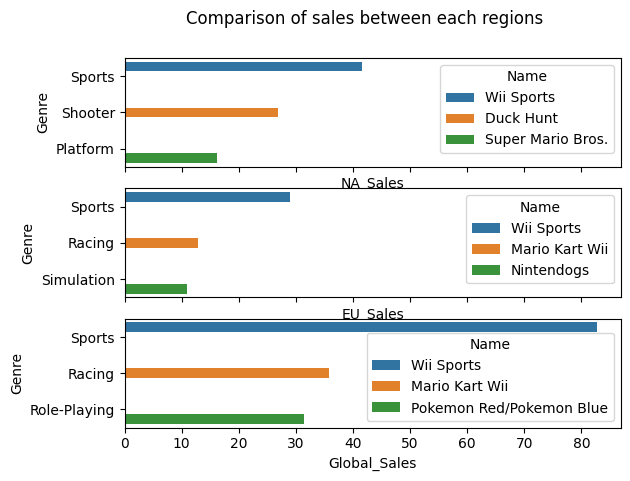

In [18]:
share = fig, axes = plt.subplots(3, 1, sharex = True)

sns.barplot(ax = axes[0], data = na_sales_top_3, x = 'NA_Sales', y = 'Genre', hue = 'Name', orient = 'h')
sns.barplot(ax = axes[1], data = eu_sales_top_3, x = 'EU_Sales', y = 'Genre', hue = 'Name', orient = 'h')
sns.barplot(ax = axes[2], data = global_sales_top_3, x = 'Global_Sales', y = 'Genre', hue = 'Name', orient = 'h')
fig.suptitle('Comparison of sales between each regions')

plt.show()

# Analyze

Let's see if there are some genres that significantly more likely to perform better or worse in Japan than others or not.

Prep Data

In [19]:
vgsales[['Genre','JP_Sales']].head()

,Genre,JP_Sales
0,Sports,3.77
1,Platform,6.81
2,Racing,3.79
3,Sports,3.28
4,Role-Playing,10.22


In [20]:
df_jp = vgsales.groupby('Genre')['JP_Sales'].sum().reset_index()

In [21]:
df_na = vgsales.groupby('Genre')['NA_Sales'].sum().reset_index()

In [22]:
df_eu = vgsales.groupby('Genre')['EU_Sales'].sum().reset_index()

In [23]:
df_global = vgsales.groupby('Genre')['Global_Sales'].sum().reset_index()

In [24]:
df_other = vgsales.groupby('Genre')['Other_Sales'].sum().reset_index()

In [25]:
pdList = [df_jp, df_na['NA_Sales'], df_eu['EU_Sales'], df_global['Global_Sales'], df_other['Other_Sales']]
new_df = pd.concat(pdList, axis = 1)
new_df

,Genre,JP_Sales,NA_Sales,EU_Sales,Global_Sales,Other_Sales
0,Action,158.65,861.77,516.48,1722.84,184.92
1,Adventure,51.99,101.93,63.74,234.59,16.70
2,Fighting,87.15,220.74,100.00,444.05,36.19
3,Misc,106.67,396.92,211.77,789.87,73.92
4,Platform,130.65,445.99,200.65,829.13,51.51
5,Puzzle,56.68,122.01,50.52,242.21,12.47
6,Racing,56.61,356.93,236.31,726.76,76.68
7,Role-Playing,350.29,326.50,187.57,923.83,59.38
8,Shooter,38.18,575.16,310.45,1026.20,101.90
9,Simulation,63.54,181.78,113.02,389.98,31.36


In [26]:
new_melt = new_df.melt(id_vars = 'Genre')
data = new_melt[['variable', 'value']]
data

,variable,value
0,JP_Sales,158.65
1,JP_Sales,51.99
2,JP_Sales,87.15
3,JP_Sales,106.67
4,JP_Sales,130.65
5,JP_Sales,56.68
6,JP_Sales,56.61
7,JP_Sales,350.29
8,JP_Sales,38.18
9,JP_Sales,63.54


Create ANOVA Table 
- If reject = True: Significant difference between Japan sales and other regions
- If reject = False: No significant difference between Japan sales and other regions

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Performs one-way ANOVA
model = ols('value ~ C(variable)', data = data).fit()
anova_table = sm.stats.anova_lm(model)

#Print ANOVA table
print(anova_table)

               df        sum_sq        mean_sq          F        PR(>F)
C(variable)   4.0  3.529497e+06  882374.362677  14.056508  5.788000e-08
Residual     55.0  3.452535e+06   62773.368091        NaN           NaN


In [28]:
#Print posthoc
posthoc = pairwise_tukeyhsd(data['value'], data['variable'])
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------
    EU_Sales Global_Sales  533.7733    0.0   245.296 822.2506   True
    EU_Sales     JP_Sales   -93.535 0.8901 -382.0123 194.9423  False
    EU_Sales     NA_Sales    160.08 0.5257 -128.3973 448.5573  False
    EU_Sales  Other_Sales  -134.815 0.6813 -423.2923 153.6623  False
Global_Sales     JP_Sales -627.3083    0.0 -915.7856 -338.831   True
Global_Sales     NA_Sales -373.6933  0.005 -662.1706  -85.216   True
Global_Sales  Other_Sales -668.5883    0.0 -957.0656 -380.111   True
    JP_Sales     NA_Sales   253.615 0.1103  -34.8623 542.0923  False
    JP_Sales  Other_Sales    -41.28 0.9943 -329.7573 247.1973  False
    NA_Sales  Other_Sales  -294.895 0.0428 -583.3723  -6.4177   True
--------------------------------------------------------------------


In conclusion: There is a significant difference between Japan sales and Global sales.